<h1>objective</h1>
To predict whether a cancer patient will survive or not based on the given features

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
column=['Age','Op_year','Axil_nodes','Sruv_stats']
hab_data=pd.read_csv('haberman.csv',names=column)

# Read the dataset into the variable hab_data and name the columns

In [21]:
hab_data.shape
#there a total of 306 rows and 4 feature

(306, 4)

In [22]:
hab_data.Sruv_stats[hab_data.Sruv_stats==1]='Alive' # updating Sruv_stats 1 as alive  for easy understanding
hab_data.Sruv_stats[hab_data.Sruv_stats==2]='Dead'# updating Sruv_stats 2 as dead  for easy understanding

In [23]:
hab_data['Sruv_stats'].value_counts()

Alive    225
Dead      81
Name: Sruv_stats, dtype: int64

<b>Data set seems to be unbalanced because out of 306 point there are 225 alive and  only 81 for dead</b>

In [24]:
hab_data.isna().sum()

Age           0
Op_year       0
Axil_nodes    0
Sruv_stats    0
dtype: int64

<b>There are no Null values</b>

In [25]:
hab_data.head()

,Age,Op_year,Axil_nodes,Sruv_stats
0,30,64,1,Alive
1,30,62,3,Alive
2,30,65,0,Alive
3,31,59,2,Alive
4,31,65,4,Alive


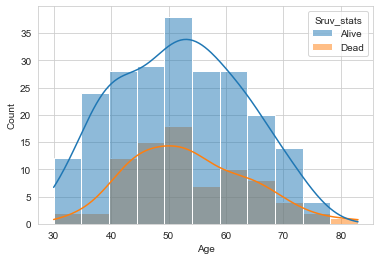

In [26]:
sns.histplot(data=hab_data,x='Age',hue='Sruv_stats',kde=True)
plt.show()

1.It is clear that  based on Age feature we cannot decide the survivual Status<br>
2.But one conclusion i can get from the above plot is the person age above 75 will have less survive chance


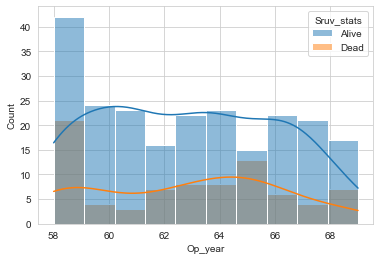

In [27]:
sns.histplot(data=hab_data,x='Op_year',hue='Sruv_stats',kde=True)
plt.show()

1.From the above plot also i can say that Operation year only will not convey any information<br>

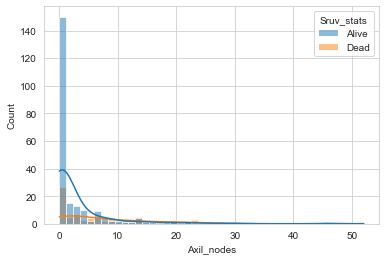

In [28]:
sns.histplot(data=hab_data,x='Axil_nodes',hue='Sruv_stats',kde=True,legend=True)
plt.show()

In [29]:
alive_data=hab_data.loc[hab_data["Sruv_stats"]=="Alive"]
alive_data.head()

,Age,Op_year,Axil_nodes,Sruv_stats
0,30,64,1,Alive
1,30,62,3,Alive
2,30,65,0,Alive
3,31,59,2,Alive
4,31,65,4,Alive


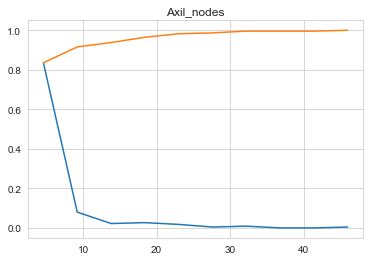

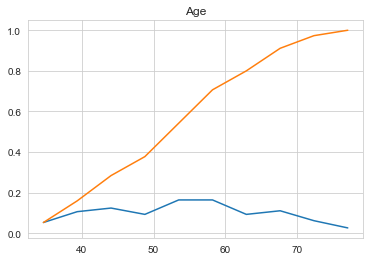

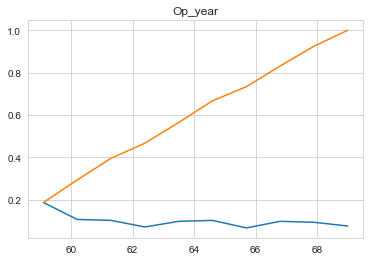

In [30]:
#CDF for Alive person baesd on Axil_nodes
def plx(t,b,ti):
    counts,bin_edges=np.histogram(t,bins=b,density=True)
    pdf=counts/sum(counts)
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1::],pdf)
    plt.plot(bin_edges[1::],cdf)
    plt.title(ti)
    plt.show()
plx(alive_data['Axil_nodes'],10,'Axil_nodes')
plx(alive_data['Age'],10,'Age')
plx(alive_data['Op_year'],10,'Op_year')
plt.show()


From the above PDF and CDF all alive person data is spreaded all over the graph

In [31]:
dead_data=hab_data.loc[hab_data["Sruv_stats"]=="Dead"]
dead_data.head()

,Age,Op_year,Axil_nodes,Sruv_stats
7,34,59,0,Dead
8,34,66,9,Dead
24,38,69,21,Dead
34,39,66,0,Dead
43,41,60,23,Dead


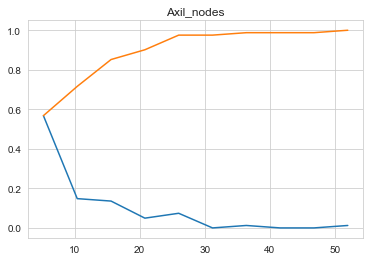

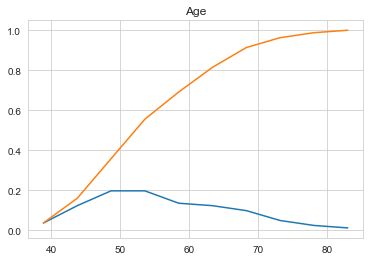

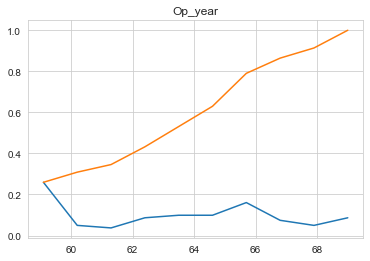

In [32]:
plx(dead_data['Axil_nodes'],10,'Axil_nodes')
plx(dead_data['Age'],10,'Age')
plx(dead_data['Op_year'],10,'Op_year')


From the PDF and CDF functions it is hard to predict which the is graph is spread over a wide range 

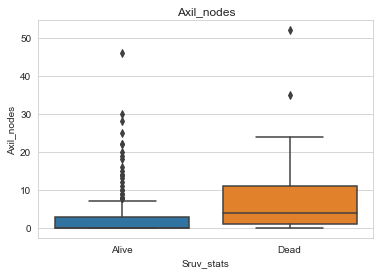

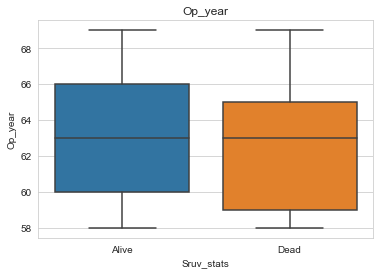

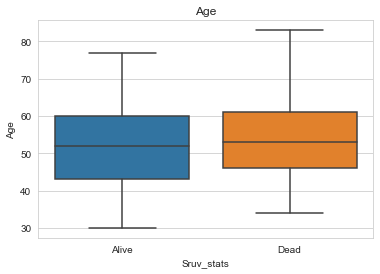

In [33]:
#box_plot
def bx(x,ti,dat):
    sns.boxplot(x='Sruv_stats',y=x,data=dat)
    plt.title(ti)
    plt.show()
bx('Axil_nodes','Axil_nodes',hab_data)
bx('Op_year','Op_year',hab_data)
bx('Age','Age',hab_data)

From the above box plot we can say the data is hard to divide <br>
We can sy that more than 90 percentage of the data is overlapping <br>
But atleast axil_node feature will helpful for prediction but doesn't work to a geat level

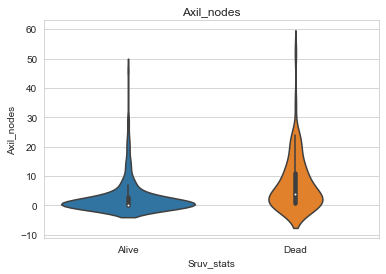

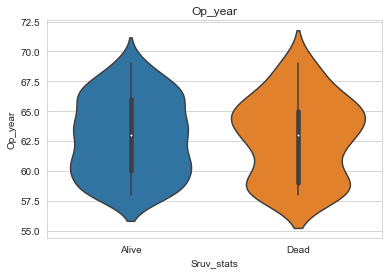

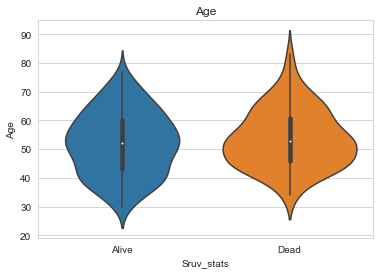

In [34]:
#volion plot
def vx(y,ti,dat=hab_data):
    sns.violinplot(x='Sruv_stats',y=y,data=dat)
    plt.title(ti)
    plt.show()
vx('Axil_nodes','Axil_nodes',hab_data)
vx('Op_year','Op_year',hab_data)
vx('Age','Age',hab_data)

From the violin plot we can Axil_node is the feature which may be useful for prediction and there is also a lot of ovelapping between the data 

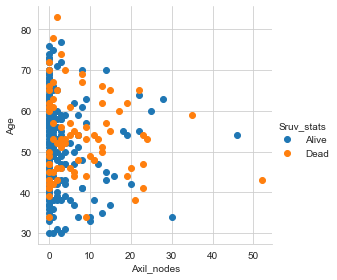

In [35]:
sns.set_style("whitegrid");
sns.FacetGrid(hab_data, hue="Sruv_stats", height=4) \
   .map(plt.scatter, "Axil_nodes", "Age") \
   .add_legend();
plt.show();


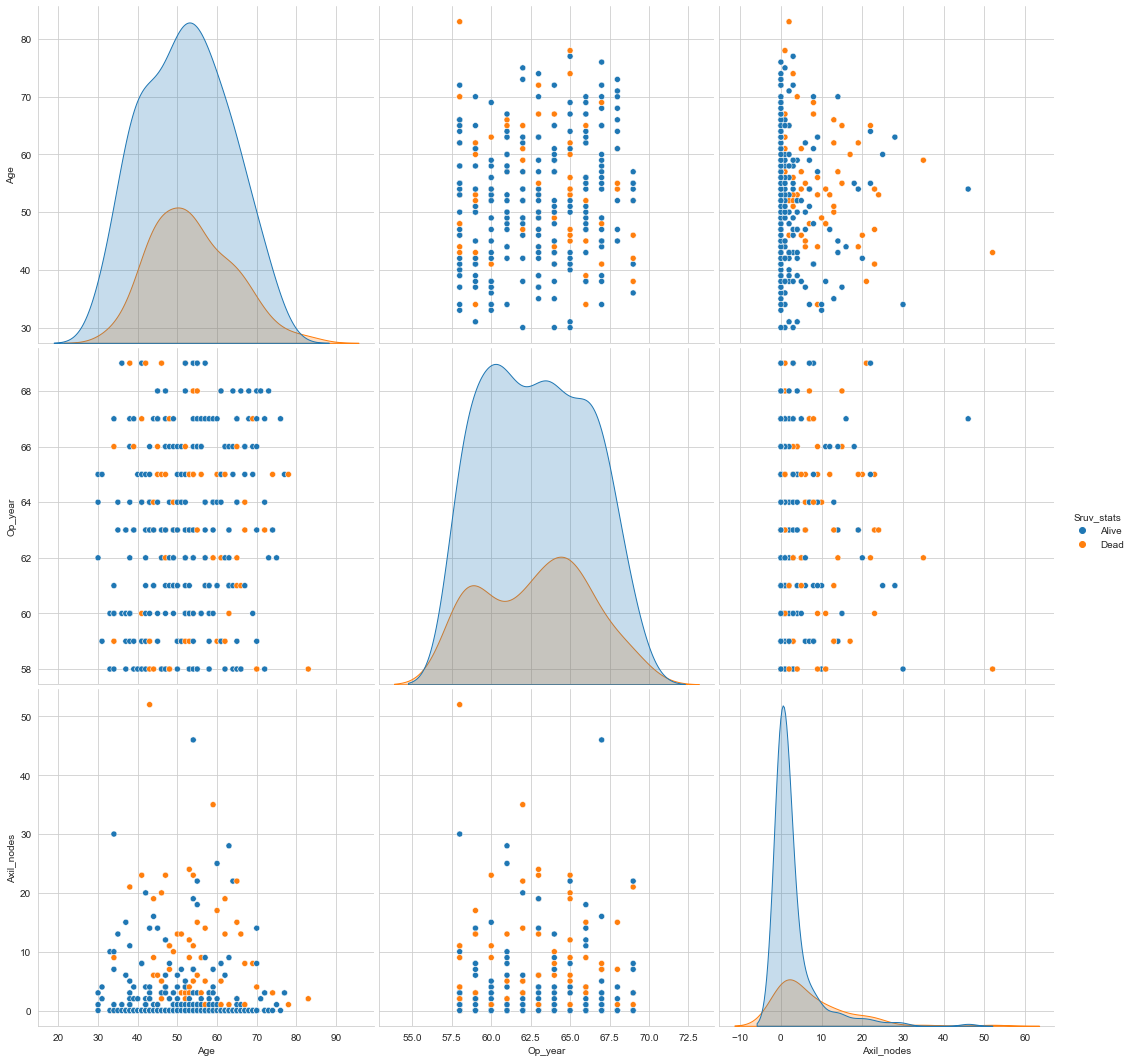

In [36]:
sns.set_style('whitegrid')
sns.pairplot(hab_data,hue='Sruv_stats',height=5)
plt.show()

1.No Two features will give exact prediction for Surviual Stats<br>
2.It is hard to predict surviual stats from the above data because there is a lot of overlapping between them

<h1>Conclusion</h1><h3><b>
1.Haberman data set is highly imbalanced dataset which contains a unequal amount of data <br>
2.There are is high overlap between the data<br>
3.Based on the given  features it is hard to predict the surviual status<br>
4.Bases on the above techinques it is hard to predict the surviual status.<br><b></h3>